In [3]:
!pip install ipdb
!pip install seaborn==0.9.0

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 215kB 36.6MB/s ta 0:00:01
  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import numpy as np
import glob
import shutil
import ipdb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import ast
from itertools import combinations,product
import nltk
from pathlib import Path

In [2]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

# Variables input for analysis

In [2]:
source_dirctory=r'/home/ec2-user/SageMaker/segcaps_output_images/results_csv'
dst_directory=r'/home/ec2-user/SageMaker/segcaps_output_images/results_csv'


In [16]:
ls

0                                         summary_train.csv
250run_iter_test_iter_5/                  test_file_pre_sync_22_nov.txt
categorical_focal_loss/                   test_summary_results_13_nov_19.xlsx
current_dice_files.txt                    train_file_pre_sync_22_nov.txt
gnrl_dice_loss/                           train_summary_results_13_nov_19.xlsx
parameter_rerun_segcaps_13_nov_19.pickle  weighted_softmax/
summary_file_pre_sync_22_nov.txt          weighted_spread_loss/
summary_test.csv


In [18]:
trl_train_summary=pd.read_excel('test_summary_results_13_nov_19.xlsx')

trl_train_summary

,Unnamed: 0,index,file_path,learning_rate,loss_function,class_wght,iteration_no,unknown,dice_background,dice_liver,dice_l_kidney,dice_r_kidney,dice_spleen,loss,loss_diff_rate_per_step,loss_lr_concat,dice_mean,no_of_epochs
0,0,0,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,500,351,0.486857,0.064033,0.008259,0.008500,0.022662,0.919636,NaN,0.5_generalised_dice_loss,0.118062,2
1,1,1,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,750,351,0.577355,0.066508,0.008063,0.009265,0.023847,0.919127,-2.036120e-06,0.5_generalised_dice_loss,0.137008,3
2,2,2,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,1000,352,0.635026,0.065257,0.008929,0.009423,0.023979,0.918738,-1.555680e-06,0.5_generalised_dice_loss,0.148523,4
3,3,3,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,1250,352,0.671734,0.065439,0.009062,0.009854,0.024611,0.918484,-1.015680e-06,0.5_generalised_dice_loss,0.156140,5
4,4,4,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,1500,352,0.707455,0.070020,0.009174,0.010416,0.024494,0.918155,-1.317720e-06,0.5_generalised_dice_loss,0.164312,6
5,5,5,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,1750,352,0.724962,0.064742,0.008887,0.009788,0.025174,0.918125,-1.188000e-07,0.5_generalised_dice_loss,0.166711,7
6,6,6,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,2000,352,0.741850,0.062948,0.009061,0.010093,0.024989,0.918019,-4.216000e-07,0.5_generalised_dice_loss,0.169788,8
7,7,7,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,2250,352,0.761765,0.063041,0.008748,0.010181,0.024973,0.917814,-8.200000e-07,0.5_generalised_dice_loss,0.173742,9
8,8,8,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,2500,352,0.785847,0.063146,0.008712,0.010310,0.025541,0.917496,-1.275800e-06,0.5_generalised_dice_loss,0.178711,10
9,9,9,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5000,generalised_dice_loss,[0.00125978 0.03987201 0.36867433 0.35872208 0...,2750,352,0.799532,0.062035,0.008903,0.010260,0.024263,0.917267,-9.134000e-07,0.5_generalised_dice_loss,0.180998,11


# Main functions used for analysis

In [97]:
source_dirctory=r'/home/ec2-user/SageMaker/segcaps_output_images/results_csv/loss_spec_info'
dst_directory=r'/home/ec2-user/SageMaker/segcaps_output_images/results_csv'

test_lst=['dice.csv',
          'val_data_22_11_2019_pre_sync_dice.csv',
          'nonval_pat_32_3_nonval_pat_32_3_dice.csv',
          'nonval_pat_32_3_dice.csv','non_val_pat_3_32_dice.csv','nonval_pat_3_32_non_val_pat_3_32_dice.csv',
          'SegCaps_multilabels.txt']
try:
    
    agg_df_results=agg_results_info_segcaps(source_dirctory,dst_directory,test_lst)
except:
    ipdb.set_trace()

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[  1.          31.64997857 292.64977218 284.74978171 183.73985934]
current_iter=750

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[  1.          31.64997857 292.64977218 284.74978171 183.73985934]
current_iter=750

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[  1.          31.64997857 292.64977218 284.74978171 183.73985934]
current_iter=400

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[0.03987201 0.36867433 0.35872208 0.2314718  0.00125978]
current_iter=0
data_aug=Tr

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[0.03987201 0.36867433 0.35872208 0.2314718  0.00125978]
current_iter=0
data_aug=Tr

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[0.00125978 0.03987201 0.36867433 0.35872208 0.2314718 ]
current_iter=0
data_aug=Tr

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[  1.          31.64997857 292.64977218 284.74978171 183.73985934]
current_iter=0
d

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[0.03987201 0.36867433 0.35872208 0.2314718  0.00125978]
current_iter=0
data_aug=Tr

agg_dice_score=None
aug_dict={'intensity': {'random_shift': 0.2, 'random_scale': 0.4, 'clamp_min': -1.0}, 'spatial': {'trans_input_centre_bool': True, 'scale_fit_bool': True, 'trans_rand_bool': True, 'trans_rand_random_ofs_arg': [20, 20], 'rot_rand_bool': True, 'rotation_random_angle_arg': [0.35], 'rand_scal_uni_bool': True, 'random_scale_uniform_arg': 0.2, 'rand_scale_non_uni_bool': True, 'random_scale_non_uniform_arg': [0.1, 0.1], 'translate_orig_centre_bool': True, 'deform_bool': True, 'deformation_key_nodes_arg': [8, 8], 'deformation_max_deform_arg': 15, 'scale_fit_prob_thresh_sp': 0, 'trans_rand_fit_prob_thresh_sp': 0.7, 'rot_rand_prob_thresh_sp': 0.5, 'flip_rand_bool': True, 'flip_rand_prob_thresh_sp': 0.5, 'flip_random_scaling_parameter': [0.5], 'rand_scal_prob_thresh': 0.7, 'translate_orig_centre_thresh': 0, 'deform_prob_thresh': 0.1}}
base_folder=./Dataset/
batch_size=1
channel_axis=1
cls_wghts=[  1.          31.64997857 292.64977218 284.74978171 183.73985934]
current_iter=750

In [98]:
final_df=None
for k,v in agg_df_results.items():
    
    if final_df is None:
        final_df=v
    else:
        final_df=final_df.append(v,ignore_index=True)
        
final_df.drop_duplicates(inplace=True)


In [78]:
final_df[final_df['epoch_no']>=50]

,dice,mean,background,liver,right_kidney,left_kidney,spleen,output_folder,learning_rates,loss_function,cls_wghts,epoch_no,epoch_no_bool
252,pat_id_32_t1dual_inphase_slice_no_10_256grey_l...,NaN,0.965542,0.000000,0.000000,0.000000,NaN,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
253,pat_id_32_t1dual_inphase_slice_no_11_256grey_l...,NaN,0.964103,0.000000,0.000000,0.000000,NaN,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
254,pat_id_32_t1dual_inphase_slice_no_12_256grey_l...,NaN,0.962291,0.000000,0.000000,0.000000,NaN,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
255,pat_id_32_t1dual_inphase_slice_no_13_256grey_l...,NaN,0.958473,0.000000,0.000000,0.000000,NaN,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
256,pat_id_32_t1dual_inphase_slice_no_14_256grey_l...,0.190068,0.950341,0.000000,0.000000,0.000000,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
257,pat_id_32_t1dual_inphase_slice_no_15_256grey_l...,NaN,0.945188,0.000000,NaN,0.000000,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
258,pat_id_32_t1dual_inphase_slice_no_16_256grey_l...,NaN,0.939924,0.000000,NaN,0.000000,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
259,pat_id_32_t1dual_inphase_slice_no_17_256grey_l...,NaN,0.936156,0.000000,NaN,0.000000,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
260,pat_id_32_t1dual_inphase_slice_no_18_256grey_l...,NaN,0.931960,0.000000,NaN,0.000000,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0
261,pat_id_32_t1dual_inphase_slice_no_19_256grey_l...,NaN,0.928739,0.000000,NaN,0.000000,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.500,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,50.0,0


In [112]:
final_df_filt=final_df.groupby(['learning_rates','loss_function',
                  'cls_wghts','output_folder']).filter(lambda x: (x['dice'].nunique() >= 3))


final_df_summary=final_df_filt[final_df_filt['epoch_no']>=20].groupby(['learning_rates','loss_function',
             'cls_wghts','output_folder']).size().reset_index().rename(columns={0:'count'})

#final_df_summary=final_df_summary[final_df_summary['loss_function']!='weighted_spreadloss']
#final_df_summary.loc[final_df_summary['loss_function']=='generalised_dice_loss',
              #       ['output_folder','learning_rates','count']]
#final_df_summary.loc[7,'output_folder']
segcaps_summary_spreadsheet=final_df_summary[final_df_summary['count']>1260]
segcaps_summary_spreadsheet.to_excel('segcaps_summary_spreadsheet_24_nov_2019.xlsx')
#final_df.loc[final_df['output_folder']=='./Experiments/SegCaps_multilabels_2019-11-05_22-12-47','dice'].unique()

(242855, 12)

In [113]:
pwd

'/home/ec2-user/SageMaker/segcaps_output_images'

In [60]:
#Stripping out partial epoch results to simplfy analysis
final_df.rename(columns=dict(zip(final_df.columns[2:7],
                         ['background','liver','right_kidney','left_kidney','spleen'])),inplace=True)
final_df['epoch_no_bool']=final_df['epoch_no']%250
final_df['epoch_no']=final_df['epoch_no']/250
final_df_filt=final_df[final_df['epoch_no_bool']==0]
final_df_filt.to_excel('aggregated_df_for_analysis_visualisation.xlsx')

In [55]:
final_df_filt.head()

,dice,mean,background,liver,right_kidney,left_kidney,4,output_folder,learning_rates,loss_function,cls_wghts,epoch_no,epoch_no_bool
0,pat_id_32_t1dual_inphase_slice_no_10_256grey_l...,0.170424,0.715073,0.085773,0.024668,0.026605,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,7.0,0
1,pat_id_32_t1dual_inphase_slice_no_11_256grey_l...,0.168664,0.714149,0.085962,0.017915,0.025296,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,7.0,0
2,pat_id_32_t1dual_inphase_slice_no_12_256grey_l...,0.169492,0.709602,0.098476,0.015102,0.024282,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,7.0,0
3,pat_id_32_t1dual_inphase_slice_no_13_256grey_l...,0.170477,0.711359,0.108381,0.011633,0.021012,0.000000,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,7.0,0
4,pat_id_32_t1dual_inphase_slice_no_14_256grey_l...,0.174921,0.712682,0.119341,0.004558,0.031888,0.006138,./Experiments/SegCaps_multilabels_2019-11-04_1...,0.5,generalised_dice_loss,[ 1. 31.64997857 292.64977218 284.74...,7.0,0


## Generate aggregated dataframe functions

In [3]:

def agg_results_info_segcaps(src_dir:str,dst_dir:str,test_keyword=['test.csv','train.csv','SegCaps_multilabels.txt'],
                             walk_type='per_epoch',
                             idx_attr={'output_folder':str,'learning_rates':float,'loss_function':str,
                                            'cls_wghts':str}):
    """The purpose of this method is to aggregate multiple csv files
    from segcaps grdisearch and concatenate them together"""
    
    #Generate keyword for analysis
    agg_df={k:None for k in test_keyword if k[-4:].find('.csv')!=-1}
    txt_summ_fl=[x for x in test_keyword if x[-4:].find('.txt')!=-1][0]
    summary_report_agg=None
    
    #Analysis for subdirectory 
    for root,subdir,files in os.walk(src_dir):
        #Levenstein distance to evaluate if test file matches
        if len(files)>0:
            
            fnd_smry_fl=fuzzy_txt_file_str_match(files,txt_summ_fl)
            #ipdb.set_trace()
            #generating test list for evaluating sub files present
            test_ls={x:os.path.join(root,x) for x in test_keyword if os.path.join(root,x) in glob.glob(os.path.join(root,'*'))}
            if len(fnd_smry_fl)==1 and len(test_ls.keys())>0:
                #Reading in text file and creating dictionary summarising that specific runs training parameters.
                
                
                summary_idx,summary_report_agg=gen_run_info_dict(root,test_ls,summary_report_agg,fnd_smry_fl[0],idx_attr)

                if walk_type=='summary':
                    agg_df,summary_report_agg=summary_segcaps_walkthrough(test_ls,test_keyword,summary_report_agg,agg_df,
                                                summary_idx,dst_dir)

                elif walk_type=='per_epoch':
                    agg_df=per_epoch_walkthrough(root,fnd_smry_fl,agg_df,summary_idx,dst_dir)

                else:
                    raise 'WTF incorrect walk type selected!'
    return agg_df
                           

In [4]:
def per_epoch_walkthrough(root,fnd_smry_fl,
                          agg_df,summary_idx,
                          dst_dir,iter_str_srch='iter_'):
    
    #Finding and filtering csv files based on absolute paths
    f_paths=Path(root).rglob('*.csv')
    f_paths_filt=list(filter(lambda x:abs_str_match(x,agg_df.keys()),f_paths))
    tst_var=list(f_paths_filt)
    
    for csv_f_pth in f_paths_filt:
        #Meant to return nearest directory name i.e. the iterationg it is on. 
        summary_idx['epoch_no']=int(os.path.dirname(csv_f_pth).split('/')[-1].strip(iter_str_srch))
        f_type=os.path.basename(csv_f_pth)
        #ipdb.set_trace()
        #read in file and asssign new categorical variables to analysis
        tmp_csv=pd.read_csv(csv_f_pth)
        tmp_csv=tmp_csv.assign(**summary_idx)
        
        if agg_df[f_type] is None:
            agg_df[f_type]=tmp_csv
        else:
            agg_df[f_type]=agg_df[f_type].append(tmp_csv,ignore_index=True)
    #ipdb.set_trace()       
    return agg_df


In [5]:
def abs_str_match(tmp_str_path,tmp_str_req_mtchs):
    """Non fuzzy string match between items pathfile name matches"""
    
    path_bs_nm=os.path.basename(tmp_str_path)
    if path_bs_nm in tmp_str_req_mtchs:
        return True
    else:
        return False
            

In [6]:
def fuzzy_txt_file_str_match(files,txt_summ_fl):
    """The purpose of this method is to perform fuzzy string comparison to determine matching sub string file types"""
    fnd_smry_fl=[]
    
    for x in files:
        
        if (levenshtein_ratio_and_distance(x.lower(),txt_summ_fl.lower(),True)>0.6) and (x[-4:].find('.txt')!=-1):
            fnd_smry_fl.append(x)
        else:
            pass
    #ipdb.set_trace()
    if len(fnd_smry_fl)>1:
        #If more than one text file takes the longest one as it is the most up to date one. 
        fnd_smry_fl=[max(fnd_smry_fl,key=len)]
    try:
        
        assert len(fnd_smry_fl) <= 1, print('Error more than one txt sum file: ',fnd_smry_fl)
    except:
        varq=None
        ipdb.set_trace()
    
    return fnd_smry_fl

In [7]:
def summary_segcaps_walkthrough(test_ls,test_keyword,idx_attr,summary_report_agg,agg_df,
                                tmp_train_info_dict,dst_dir):
    """The purpose of this method is to walk through the segcaps folders and pull data primarily from the """
            #Create dictionary of keyword based paths 
    
    ipdb.set_trace()
    if len(test_ls.keys())==len(test_keyword):
        
        #Generate dataframes if file type is csv type of test and training data
        tmp_dfs={k:pd.read_csv(v) for k,v in test_ls.items() if k.find('.csv')!=-1}

        #Removing invalid index key steps from analysis
        tmp_dfs=remove_invalid_trip_values(tmp_dfs)
        #Adding appropriate index values for analysis to separate values appropriately
        tmp_dfs={k:gen_df_idx_variables(v,
                                     list(summary_idx.values())) for k,v in tmp_dfs.items()}
        #Concatenating dataframes together for final write to file. 
        for agg_k,agg_v in agg_df.items():

            if agg_v is None:
                agg_df[agg_k]=tmp_dfs[agg_k]
            else:
                agg_df[agg_k]=pd.concat([agg_df[agg_k],tmp_dfs[agg_k]],axis=0)
    #Writing final dataframe to excel for analysis
    [v.to_csv(os.path.join(dst_dir,'summary_'+k)) for k,v in agg_df.items()]
    
    return agg_df,summary_report_agg

In [8]:
def gen_run_info_dict(root,test_ls,summary_report_agg,param_file,idx_attr):
    
    tmp_train_info_dict=gen_train_param_dict(test_ls,
                                             os.path.join(root,param_file))
        #Renaming summary file names to include learning rate and loss fuctionin name for easy identification in the future
    rewrite_report_names(root,test_ls,tmp_train_info_dict)

    #Reading in of results for analysis from main method
    if summary_report_agg is None:
        summary_report_agg=[tmp_train_info_dict]
    else:
        summary_report_agg.append(tmp_train_info_dict)
        
    #Getting summary dictionary for analysis and converting type in process to correct values set/ 
    summary_idx={k:idx_attr[k](tmp_train_info_dict[k]) for k,v in idx_attr.items()}
        
    return summary_idx,summary_report_agg

In [12]:
def gen_train_param_dict(test_vals:dict,key_str='SegCaps_multilabels.txt'):
    """Read in dictionary file for analysis"""
    tmp_train_info_dict={}
    #Generates dictionary based on list of notes
    
    if key_str not in test_vals.keys():
        test_vals[os.path.basename(key_str)]=key_str
    
    with open(test_vals[os.path.basename(key_str)],'r') as fb:
        lines=fb.read().splitlines()
        for line in lines:
            print(line)
            k,v=line.split('=',1)
            tmp_train_info_dict[k]=v
    
    if key_str!='SegCaps_multilabels.txt':
        del test_vals[os.path.basename(key_str)]
            
    return tmp_train_info_dict

def rewrite_report_names(root,test_ls,tmp_train_info_dict):
    
    #Applying tmp extension to list of names
    tmp_ext='lr_'+tmp_train_info_dict['learning_rates']+'_loss_'+tmp_train_info_dict['loss_function']+'_'
    
    #Copying final item to csv file with new title for each of use.
    for k,x in test_ls.items():
        
        tmp_path=os.path.join(root,tmp_ext+os.path.basename(x))
        
        if os.path.exists(tmp_path)==False:
            shutil.copy(x,os.path.join(root,tmp_ext+os.path.basename(x)))

In [13]:
def remove_invalid_trip_values(tmp_dfs:dict)->dict:
    """The purpose of this method is to remove invalid skip """

    for k,v in tmp_dfs.items():
        
        init_diff=v.iloc[1,0]-v.iloc[0,0]
        
        for idx in range(1,v.shape[0]):
            diff_step=v.iloc[idx,0]-v.iloc[idx-1,0]
            #If idx does not match initial diff reset based on previous diff value and set difference
            if diff_step!=init_diff:
                v.iloc[idx,0]=init_diff+v.iloc[idx-1,0]
            else:
                pass
            
    return tmp_dfs

In [14]:
def gen_df_idx_variables(iter_df:pd.DataFrame,tmp_keys_values:list)->pd.DataFrame:
    """The purpose of this method is to generate a dataframe of index integers which will be implemented
    with the main results df"""
    #Replicating list of key values for analysis 
    idx_df=pd.DataFrame([tmp_keys_values for i in range(0,iter_df.shape[0])])
    
    #Vertical column wise concatenation of results and index information
    return pd.concat([idx_df,iter_df],axis=1,ignore_index=True)

## Generated agg dice score

In [7]:
def gen_seaborn_df_factorplot(unproc_df,melt_cols='no_of_epochs',
                              filt_cols=['dice_background','dice_liver','dice_l_kidney','dice_r_kidney','dice_spleen'],
                             fig_dim=(20,20)):
    
    filt_df=unproc_df[[melt_cols]+filt_cols]
    melt_df = filt_df.melt(melt_cols, var_name='cols',  value_name='vals')
    fig,ax=plt.subplots(figsize=fig_dim)
    g = sns.factorplot(ax=ax,x=melt_cols, y="vals", hue='cols', data=melt_df,legend='full')

# Sub function trial analysis

In [8]:
idx_attr={'output_folder':str,'learning_rates':float,'loss_function':str}
tmp_train_info_dict={'output_folder':'/dst_somewhere','learning_rates':'0.003','loss_function':'dice_gnrl'}
summary_idx={k:idx_attr[k](tmp_train_info_dict[k]) for k,v in idx_attr.items()}
summary_idx

{'output_folder': '/dst_somewhere',
 'learning_rates': 0.003,
 'loss_function': 'dice_gnrl'}

In [ ]:
trl_df={'test.csv':pd.DataFrame([[0,12,15],[250,12,15],[500,12,15],[7501,12,15]]),
        'train.csv':pd.DataFrame([[0,12,15],[250,12,15],[7501,12,15],[7501,12,15]])}
trl_df_2=remove_invalid_trip_values(trl_df)

add_cols=gen_df_variables(trl_df_2['test.csv'],['0.001','dice'])

# Exection of main wrapper function

In [ ]:
source_dirctory=r'/home/ec2-user/SageMaker/segcaps_output_images/results_csv/loss_spec_info'
dst_directory=r'/home/ec2-user/SageMaker/segcaps_output_images/results_csv'


test_lst=['dice.csv',
          'val_data_22_11_2019_pre_sync_dice.csv',
          'nonval_pat_32_3_nonval_pat_32_3_dice.csv',
          'nonval_pat_32_3_dice.csv','SegCaps_multilabels.txt']

agg_results_info_segcaps(source_dirctory,dst_directory,test_lst)

# Read in data for visualisation

In [149]:
os.chdir(dst_directory)


## Generate aggregate dataframes with information

In [176]:
train_data=pd.read_csv('summary_train.csv')
test_data=pd.read_csv('summary_test.csv')
train_data.columns=['index','file_path','learning_rate','loss_function','class_wght','iteration_no','unknown','loss']
test_data.columns=['index','file_path','learning_rate','loss_function','class_wght','iteration_no','unknown',
                   'dice_background','dice_liver','dice_l_kidney','dice_r_kidney','dice_spleen','loss']

train_data['loss_diff_rate_per_step']=train_data.loss.diff()/train_data.iteration_no.diff()
test_data['loss_diff_rate_per_step']=test_data.loss.diff()/test_data.iteration_no.diff()
train_data['loss_lr_concat']=train_data['learning_rate'].map(str)+'_'+train_data['loss_function']
test_data['loss_lr_concat']=test_data['learning_rate'].map(str)+'_'+test_data['loss_function']
test_data['dice_mean']=test_data[['dice_background','dice_liver','dice_l_kidney','dice_r_kidney','dice_spleen']].mean(axis=1)
#Determine number of epochs
test_data['no_of_epochs']=test_data['iteration_no']/250
train_data['no_of_epochs']=train_data['iteration_no']/250
test_data.to_excel('test_summary_results_13_nov_19.xlsx')
train_data.to_excel('train_summary_results_13_nov_19.xlsx')

In [ ]:
train_data_mean_loss_diff_info=train_data.groupby(['learning_rate',
                                           'loss_function'])['loss_diff_rate_per_step'].mean()# ,'file_path'
train_data_mean_loss_info=train_data.groupby(['learning_rate',
                                              'loss_function'])['loss'].mean()#,'file_path'

train_data_mean_loss_diff_info=pd.DataFrame(train_data_mean_loss_diff_info.reset_index())
train_data_mean_loss_info=pd.DataFrame(train_data_mean_loss_info.reset_index())

In [165]:
filt_df_per_epoch=test_data.iloc[test_data.groupby(['learning_rate', 'loss_function','file_path'])['no_of_epochs'].agg(pd.Series.idxmax)]

final_list=[]
require_no_iters=7500
iter_param_dict={}
iter_mate_copies=[]
i=1
for filt_vals in filt_df_per_epoch.iterrows():
    
    lrn_rate=filt_vals[1].loc['learning_rate']
    loss_func=filt_vals[1].loc['loss_function']
    
    file_path=os.path.basename(filt_vals[1].loc['file_path'])
    
    
    
    #Checking for copies of the same file and take the most up to date version
    current_iter_no=filt_vals[1].loc['iteration_no']
    current_iter_params=[lrn_rate,loss_func,current_iter_no,filt_vals[1].loc['class_wght']]
    
    if current_iter_params in iter_param_dict.values():
        
        iter_param_dict[file_path]=current_iter_params
        iter_mate_copies.append({file_path:current_iter_params})
    else:
        iter_param_dict[file_path]=current_iter_params
    #print(current_iter_no)
    #print(i)
    i+=1


In [195]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
segcaps_parameters=pd.DataFrame.from_dict(iter_param_dict).T
segcaps_parameters.columns=['learning_rate','loss_function','max_iter','cls_wght_array']
uniq_cls_wghts=segcaps_parameters.cls_wght_array.unique()

combinations=list(product(segcaps_parameters.learning_rate.unique().tolist(),
                          segcaps_parameters.loss_function.unique().tolist()))


In [189]:
uniq_cls_wghts_high=uniq_cls_wghts[2]
uniq_cls_wght_mid=uniq_cls_wghts[1]
uniq_cls_wght_low=uniq_cls_wghts[0]
uniq_cls_wghts_high

'[  1.          31.64997857 292.64977218 284.74978171 183.73985934]'

In [261]:
final_list=[]
for lr,lf in combinations:
    
    tmp_segcaps_lst=segcaps_parameters.loc[(segcaps_parameters['learning_rate']==lr)&(segcaps_parameters['loss_function']==lf),:]
    tmp_cls_wght_lst=tmp_segcaps_lst.cls_wght_array.values
    #Determing top class weight for analysis 
    if uniq_cls_wghts_high in tmp_cls_wght_lst:
        tmp_segcaps_filt=tmp_segcaps_lst[tmp_segcaps_lst.cls_wght_array==uniq_cls_wghts_high]
    elif uniq_cls_wght_mid in tmp_cls_wght_lst:
        tmp_segcaps_filt=tmp_segcaps_lst[tmp_segcaps_lst.cls_wght_array==uniq_cls_wght_mid]
    else:
        tmp_segcaps_filt=tmp_segcaps_lst[tmp_segcaps_lst.cls_wght_array==uniq_cls_wght_low]
    tmp_seg_caps_filt_lst=list(tmp_segcaps_filt.values[0])
    tmp_seg_caps_filt_lst.append(tmp_segcaps_filt.index[0])
    
    final_list.append(tmp_seg_caps_filt_lst)

len(final_list)

24

In [260]:
#[print(len(x)) for x in final_list]
len(final_list[:25])

25

In [262]:
param_lst=[]

require_no_iters=7500

for lrn_rate,loss_func,max_iter,_,file_path in final_list:
    
    if max_iter>=require_no_iters:
        pass
    else:    
        tmp_dict={'loss_function':loss_func,'network':'SegCaps_multilabels',
                  'output_folder':file_path,
                        'routing_type':'','batch_size':1,'max_iter':require_no_iters,'current_iter':max_iter,
                        'test_iter':250,'data_aug':True, #250
                        'num_labels':5,'learning_rates':lrn_rate,
                        'data_format':'channels_first',
                        'save_debug_images':False,'image_size':[256,256], #5000,0.001
                        'aug_dict_path':'./aug_dict_prob.json','patience':require_no_iters,'earlystop_sp':0.001,
                        'class_weights_arr':np.array([1,31.64997857, 292.64977218, 284.74978171,183.73985934])}
        
        param_lst.append(tmp_dict)


In [266]:
pd.DataFrame(param_lst)

,aug_dict_path,batch_size,class_weights_arr,current_iter,data_aug,data_format,earlystop_sp,image_size,learning_rates,loss_function,max_iter,network,num_labels,output_folder,patience,routing_type,save_debug_images,test_iter
0,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0003,focal_loss_fixed,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-02_20-19-45,7500,,False,250
1,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0003,generalised_dice_loss,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-05_18-15-47,7500,,False,250
2,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0003,weighted_softmax,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-07_02-13-27,7500,,False,250
3,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0003,weighted_spread_loss,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-10-28_16-42-40,7500,,False,250
4,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0010,focal_loss_fixed,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-02_22-17-16,7500,,False,250
5,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0010,generalised_dice_loss,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-05_20-14-18,7500,,False,250
6,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0010,weighted_softmax,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-10-29_11-36-40,7500,,False,250
7,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0010,weighted_spread_loss,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-10-28_18-41-13,7500,,False,250
8,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0100,focal_loss_fixed,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-03_00-14-41,7500,,False,250
9,./aug_dict_prob.json,1,"[1.0, 31.64997857, 292.64977218, 284.74978171,...",5000,True,channels_first,0.001,"[256, 256]",0.0100,generalised_dice_loss,7500,SegCaps_multilabels,5,SegCaps_multilabels_2019-11-05_22-12-47,7500,,False,250


In [268]:
with open('parameter_rerun_segcaps_13_nov_19.pickle','wb') as fb:
    pickle.dump(param_lst, fb, protocol=pickle.HIGHEST_PROTOCOL)

In [269]:
param_lst

[{'loss_function': 'focal_loss_fixed',
  'network': 'SegCaps_multilabels',
  'output_folder': 'SegCaps_multilabels_2019-11-02_20-19-45',
  'routing_type': '',
  'batch_size': 1,
  'max_iter': 7500,
  'current_iter': 5000,
  'test_iter': 250,
  'data_aug': True,
  'num_labels': 5,
  'learning_rates': 0.0003,
  'data_format': 'channels_first',
  'save_debug_images': False,
  'image_size': [256, 256],
  'aug_dict_path': './aug_dict_prob.json',
  'patience': 7500,
  'earlystop_sp': 0.001,
  'class_weights_arr': array([  1.        ,  31.64997857, 292.64977218, 284.74978171,
         183.73985934])},
 {'loss_function': 'generalised_dice_loss',
  'network': 'SegCaps_multilabels',
  'output_folder': 'SegCaps_multilabels_2019-11-05_18-15-47',
  'routing_type': '',
  'batch_size': 1,
  'max_iter': 7500,
  'current_iter': 5000,
  'test_iter': 250,
  'data_aug': True,
  'num_labels': 5,
  'learning_rates': 0.0003,
  'data_format': 'channels_first',
  'save_debug_images': False,
  'image_size': [25

# Class weight breakdown of parameters list


In [181]:
segcaps_parameters[segcaps_parameters['cls_wght_array']==uniq_cls_wghts[0]]

,learning_rate,loss_function,max_iter,cls_wght_array
SegCaps_multilabels_2019-11-02_20-19-45,0.0003,focal_loss_fixed,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-10-29_00-59-49,0.0003,weighted_softmax,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-10-28_16-42-40,0.0003,weighted_spread_loss,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-11-02_22-17-16,0.001,focal_loss_fixed,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-10-29_11-36-40,0.001,weighted_softmax,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-10-28_18-41-13,0.001,weighted_spread_loss,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-11-03_00-14-41,0.01,focal_loss_fixed,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-10-29_13-36-34,0.01,weighted_softmax,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-10-28_20-39-50,0.01,weighted_spread_loss,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...
SegCaps_multilabels_2019-11-03_02-12-18,0.1,focal_loss_fixed,5000,[0.03987201 0.36867433 0.35872208 0.2314718 0...


In [173]:
segcaps_parameters[segcaps_parameters['cls_wght_array']==uniq_cls_wghts[1]]

,file_name,learning_rate,loss_function,cls_wght_array
SegCaps_multilabels_2019-11-05_18-15-47,0.0003,generalised_dice_loss,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-05_20-14-18,0.001,generalised_dice_loss,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-05_22-12-47,0.01,generalised_dice_loss,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-06_00-11-23,0.1,generalised_dice_loss,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-04_17-05-39,0.5,generalised_dice_loss,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-04_19-03-47,0.5,weighted_softmax,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-04_22-58-43,0.5,weighted_spread_loss,7500,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-05_15-53-33,0.9,generalised_dice_loss,6000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-04_21-01-13,0.9,weighted_softmax,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...
SegCaps_multilabels_2019-11-05_13-54-54,0.9,weighted_spread_loss,5000,[0.00125978 0.03987201 0.36867433 0.35872208 0...


In [172]:
segcaps_parameters[segcaps_parameters['cls_wght_array']==uniq_cls_wghts[2]]

,file_name,learning_rate,loss_function,cls_wght_array
SegCaps_multilabels_2019-11-07_02-13-27,0.0003,weighted_softmax,5000,[ 1. 31.64997857 292.64977218 284.74...
SegCaps_multilabels_2019-11-09_01-25-53,0.1,weighted_softmax,64250,[ 1. 31.64997857 292.64977218 284.74...
SegCaps_multilabels_2019-11-07_00-15-18,0.5,weighted_softmax,46750,[ 1. 31.64997857 292.64977218 284.74...
SegCaps_multilabels_2019-11-07_06-15-20,0.5,weighted_spread_loss,5250,[ 1. 31.64997857 292.64977218 284.74...
SegCaps_multilabels_2019-11-07_04-11-22,0.9,weighted_softmax,5250,[ 1. 31.64997857 292.64977218 284.74...
SegCaps_multilabels_2019-11-07_08-20-44,0.9,weighted_spread_loss,5000,[ 1. 31.64997857 292.64977218 284.74...


In [105]:
final_list

[{'loss_function': 'focal_loss_fixed',
  'network': 'SegCaps_multilabels',
  'output_folder': 'SegCaps_multilabels_2019-11-02_20-19-45',
  'routing_type': '',
  'batch_size': 1,
  'max_iter': 7500,
  'current_iter': 5000,
  'test_iter': 250,
  'data_aug': True,
  'num_labels': 5,
  'learning_rates': 0.0003,
  'data_format': 'channels_first',
  'save_debug_images': False,
  'image_size': [256, 256],
  'aug_dict_path': './aug_dict_prob.json',
  'patience': 7500,
  'earlystop_sp': 0.001,
  'class_weights_arr': array([  1.        ,  31.64997857, 292.64977218, 284.74978171,
         183.73985934])},
 {'loss_function': 'generalised_dice_loss',
  'network': 'SegCaps_multilabels',
  'output_folder': 'SegCaps_multilabels_2019-11-05_18-15-47',
  'routing_type': '',
  'batch_size': 1,
  'max_iter': 7500,
  'current_iter': 5000,
  'test_iter': 250,
  'data_aug': True,
  'num_labels': 5,
  'learning_rates': 0.0003,
  'data_format': 'channels_first',
  'save_debug_images': False,
  'image_size': [25

# Non aggregate data visualisation

In [ ]:
fig,ax=plt.subplots(figsize=(20,20))
sns.lineplot(ax=ax,x='iteration_no',y='loss_diff_rate_per_step',hue='loss_lr_concat',
             data=train_data)

## generalised_dice_loss

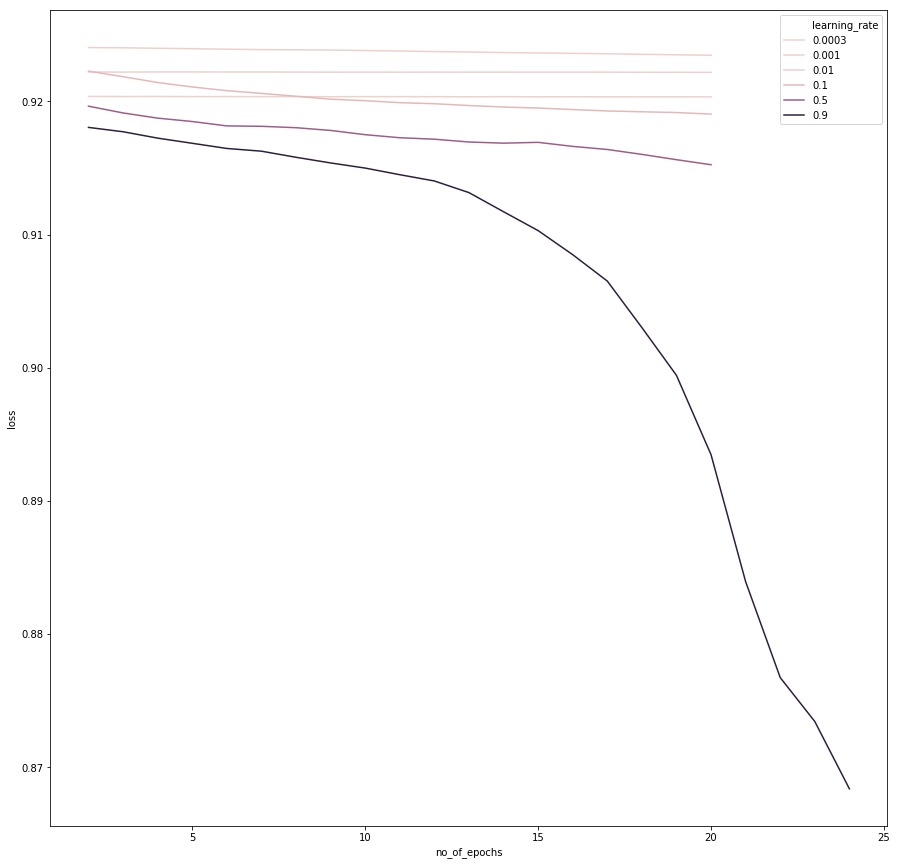

In [60]:
fig,ax=plt.subplots(figsize=(15,15))
sns.lineplot(ax=ax,x='no_of_epochs',y='loss',hue='learning_rate',
             data=test_data[test_data['loss_function']=='generalised_dice_loss'],legend='full')

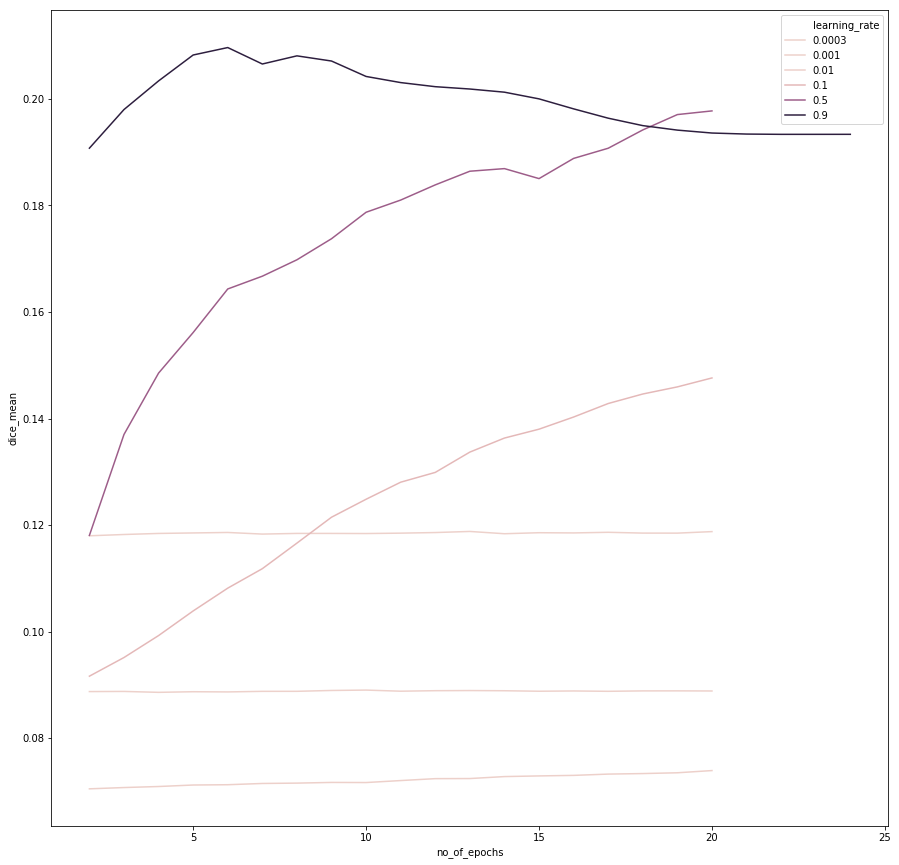

In [70]:
fig,ax=plt.subplots(figsize=(15,15))
sns.lineplot(ax=ax,x='no_of_epochs',y='dice_mean',hue='learning_rate',
             data=test_data[test_data['loss_function']=='generalised_dice_loss'],legend='full')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


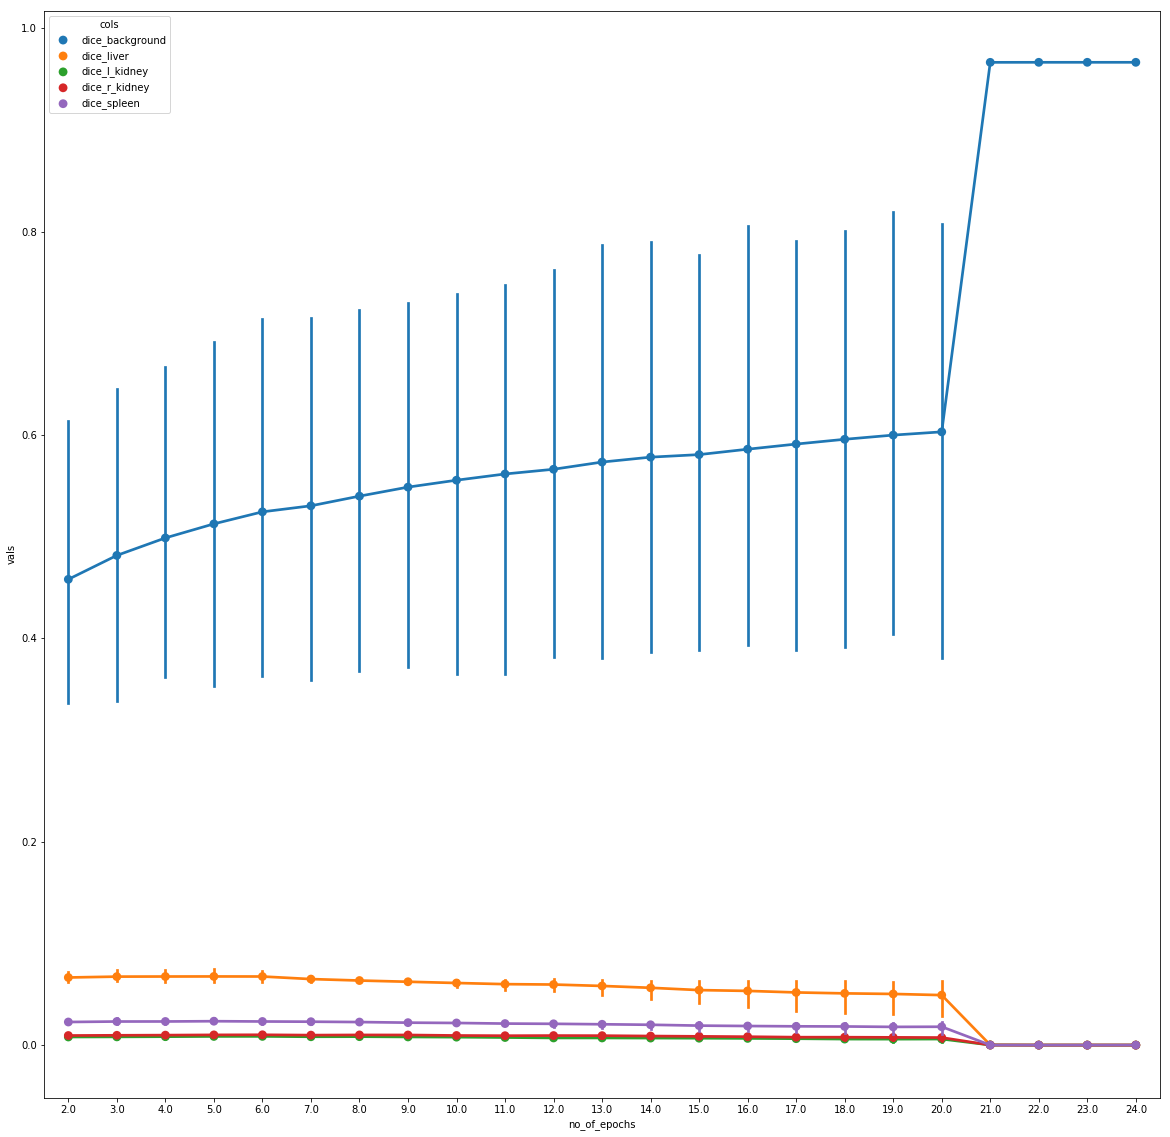

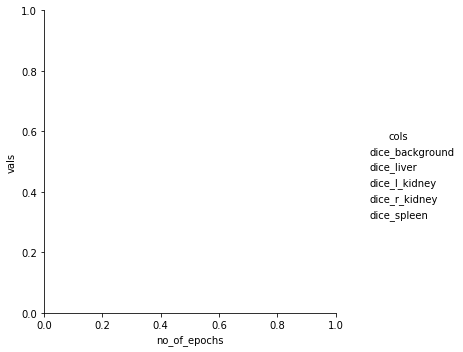

In [79]:
gen_seaborn_df_factorplot(test_data[test_data['loss_function']=='generalised_dice_loss'])

## weighted_spread_loss

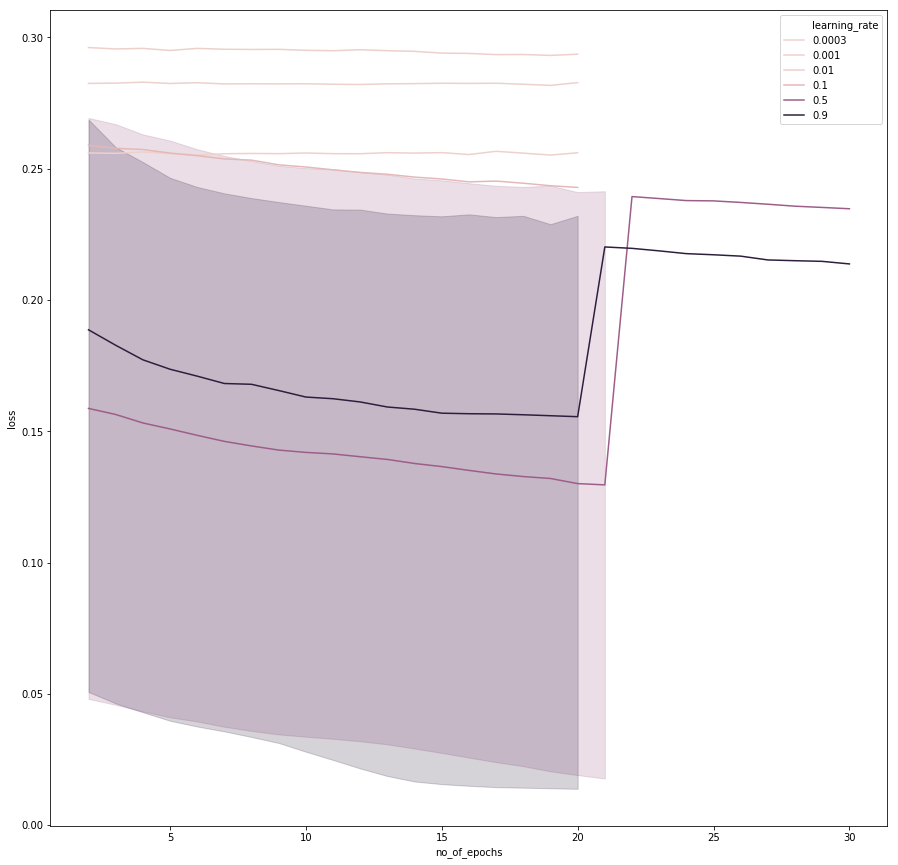

In [61]:
fig,ax=plt.subplots(figsize=(15,15))
sns.lineplot(ax=ax,x='no_of_epochs',y='loss',hue='learning_rate',
             data=test_data[test_data['loss_function']=='weighted_spread_loss'],legend='full')

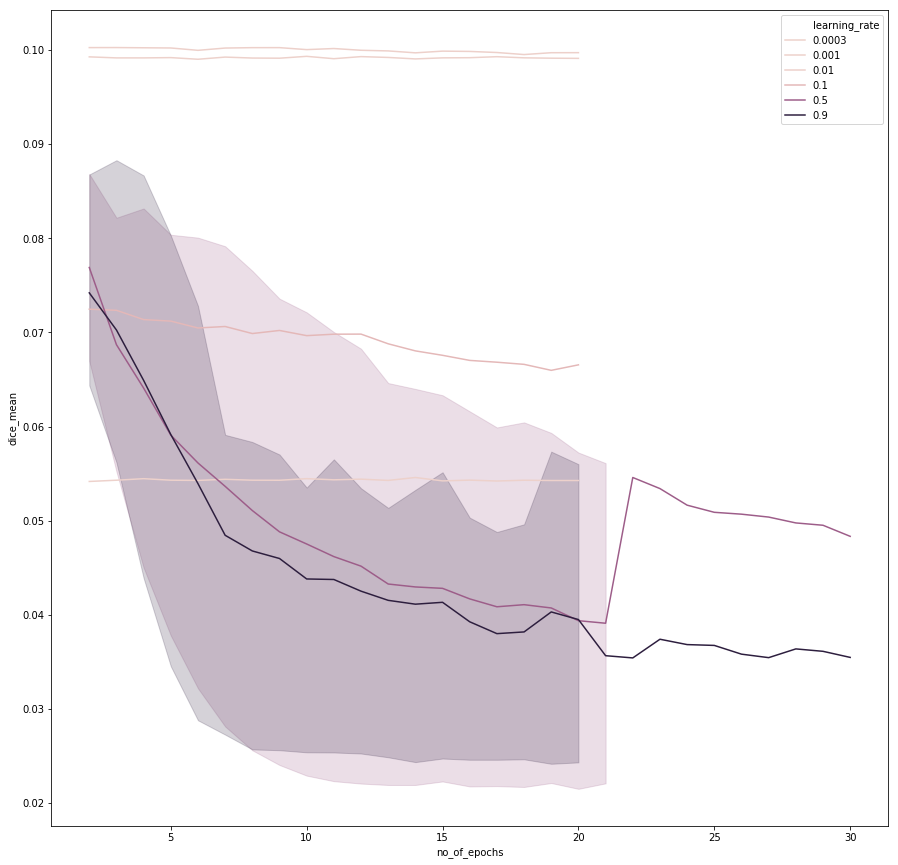

In [62]:
fig,ax=plt.subplots(figsize=(15,15))
sns.lineplot(ax=ax,x='no_of_epochs',y='dice_mean',hue='learning_rate',
             data=test_data[test_data['loss_function']=='weighted_spread_loss'],legend='full')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


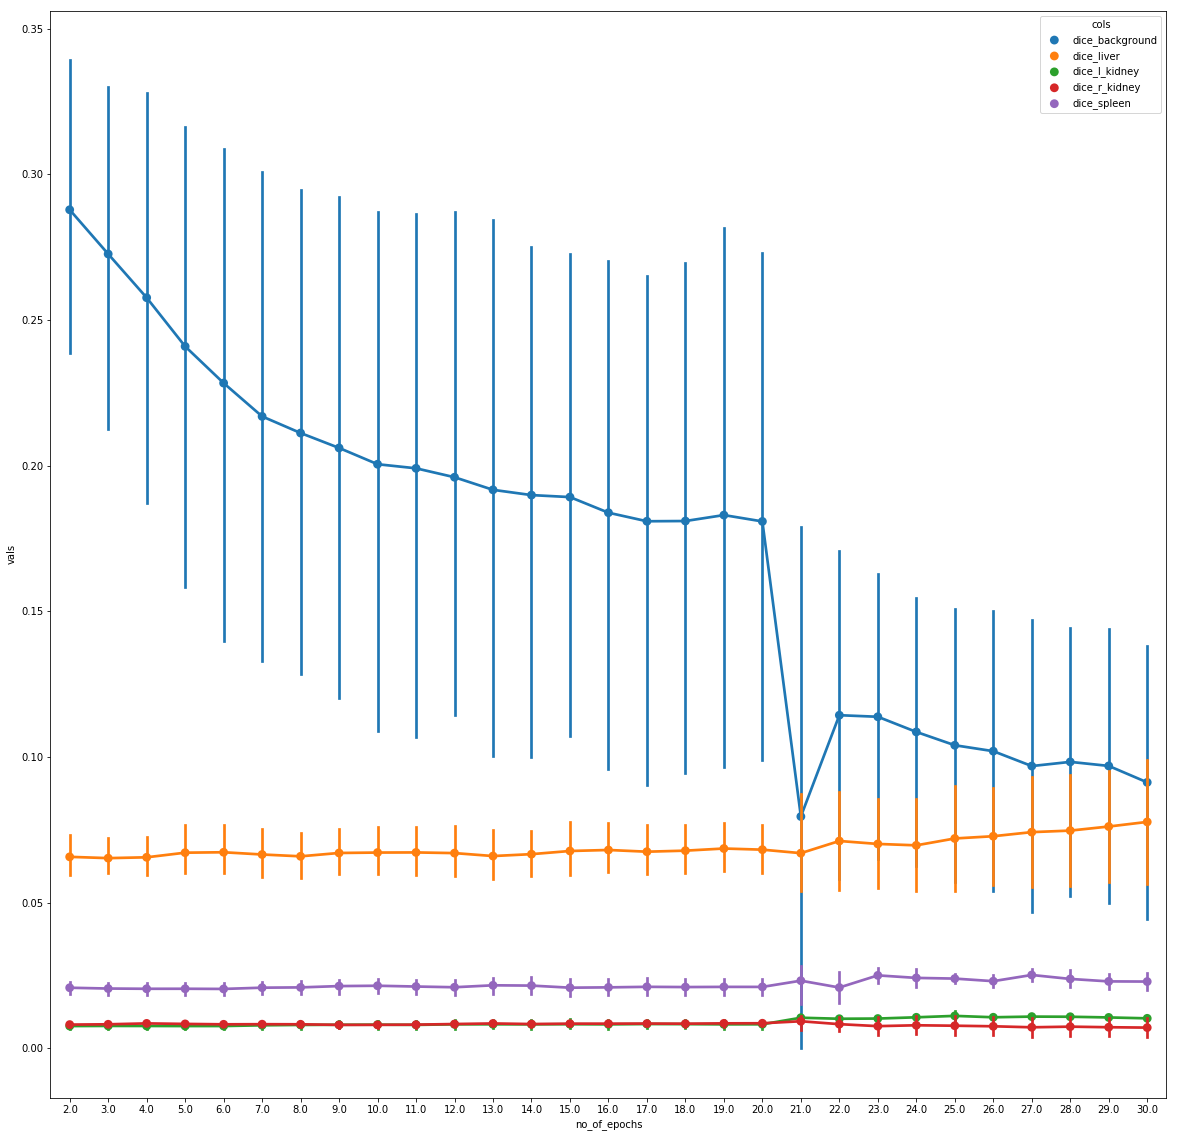

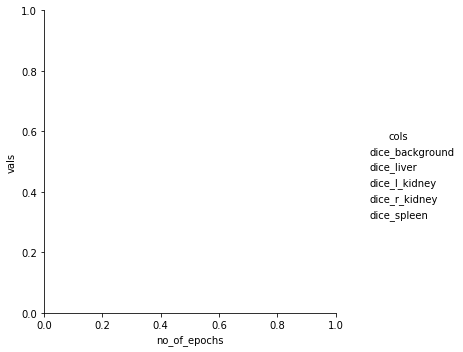

In [80]:
gen_seaborn_df_factorplot(test_data[test_data['loss_function']=='weighted_spread_loss'])

## weighted_softmax

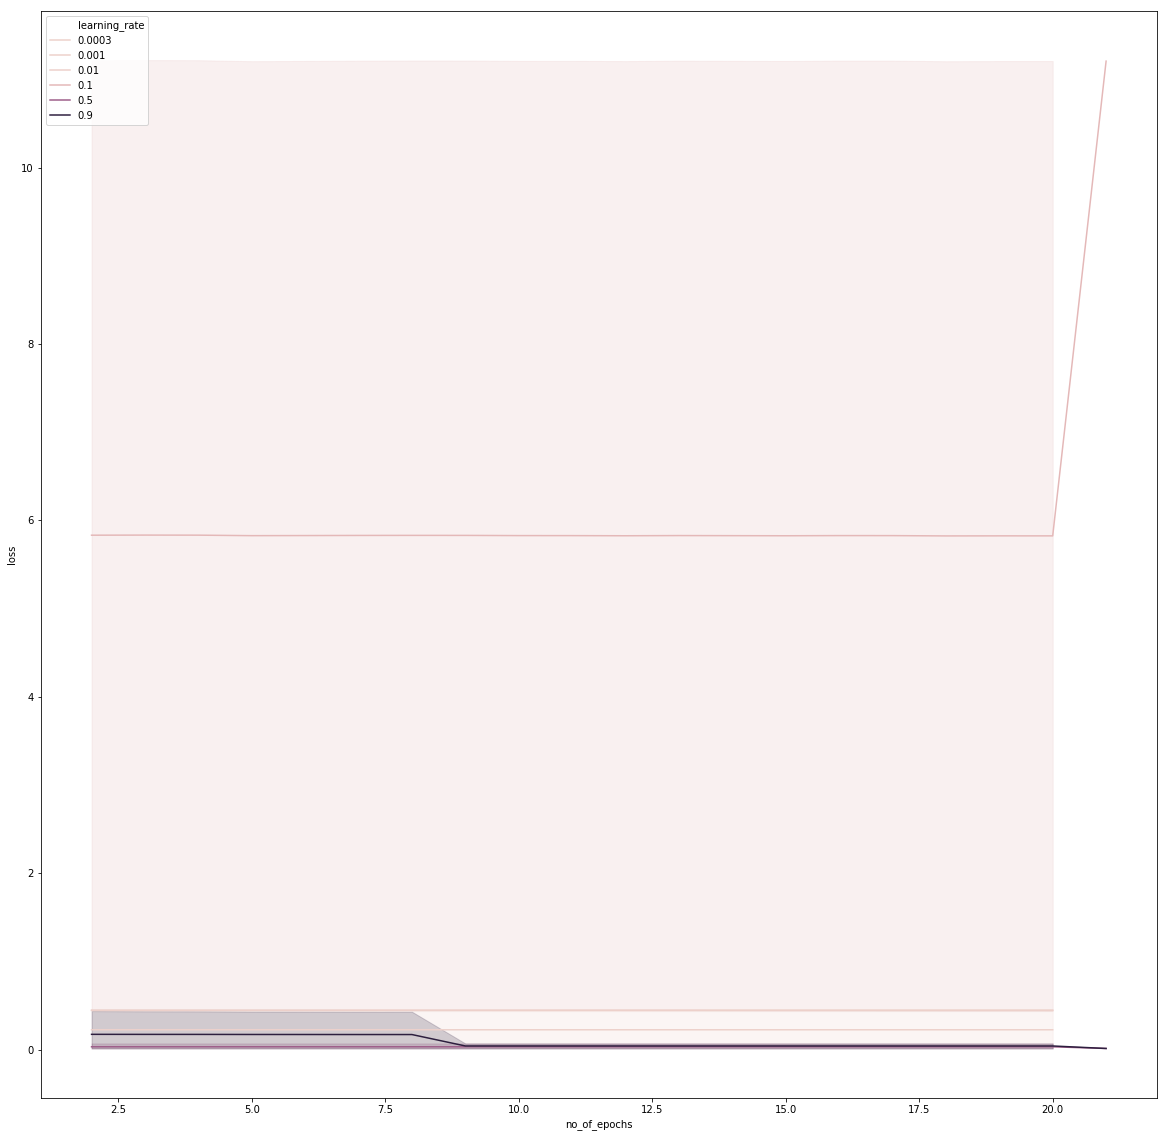

In [69]:
fig,ax=plt.subplots(figsize=(20,20))
sns.lineplot(ax=ax,x='no_of_epochs',y='loss',hue='learning_rate',
             data=test_data[(test_data['loss_function']=='weighted_softmax')&(test_data['no_of_epochs']<22)],
             legend='full')

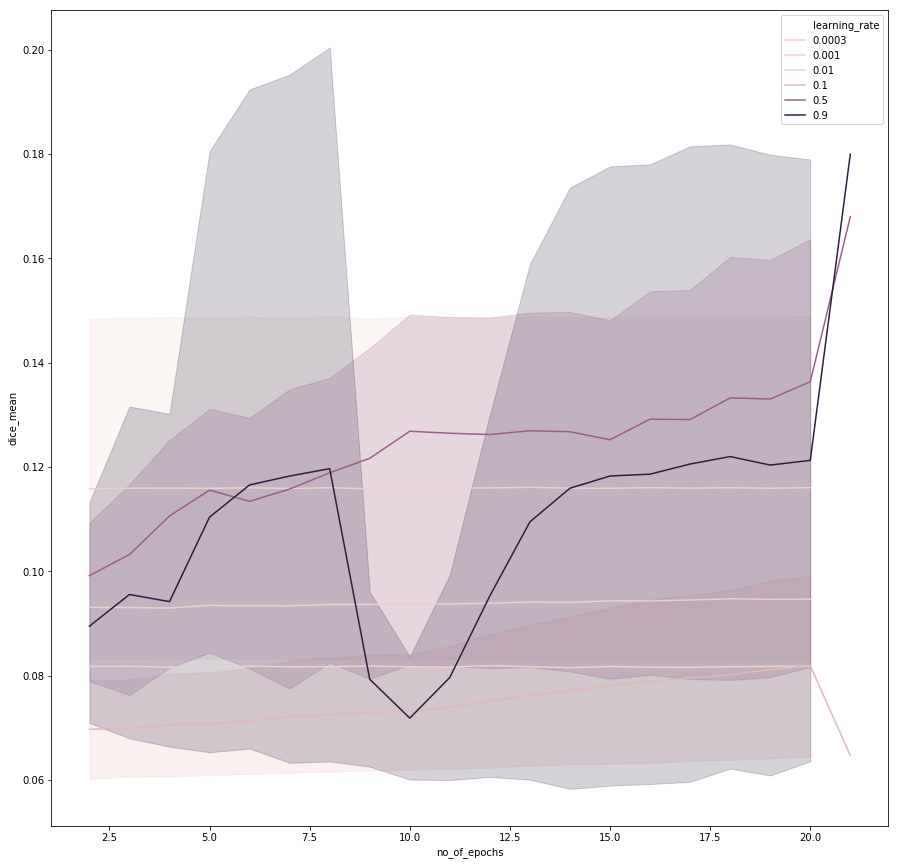

In [68]:
fig,ax=plt.subplots(figsize=(15,15))
sns.lineplot(ax=ax,x='no_of_epochs',y='dice_mean',hue='learning_rate',
             data=test_data[(test_data['loss_function']=='weighted_softmax')&(test_data['no_of_epochs']<22)],
             legend='full')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


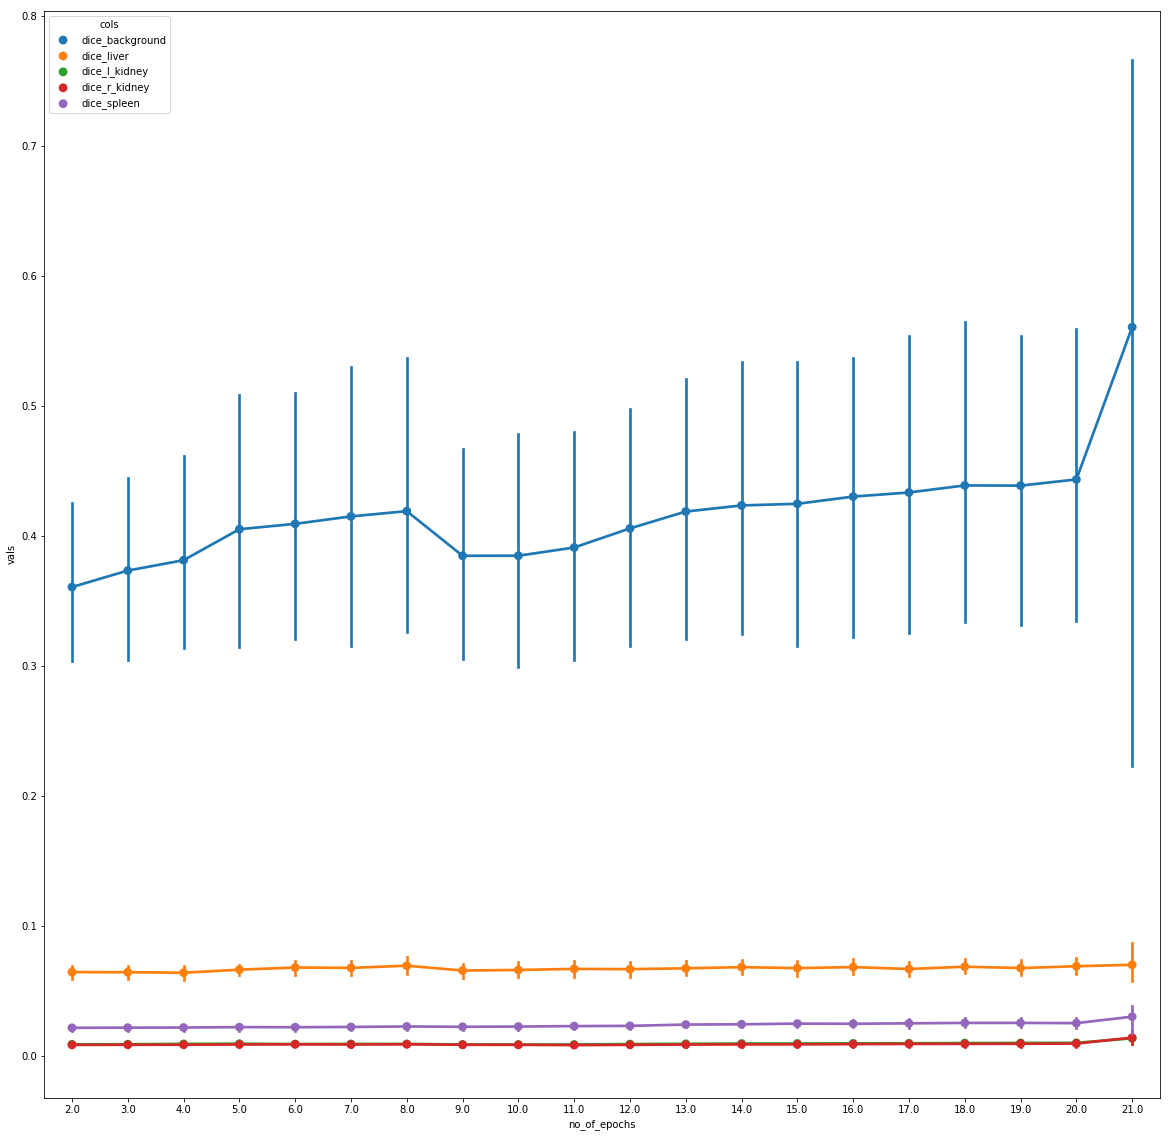

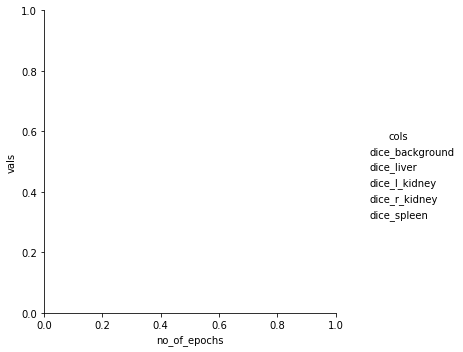

In [89]:
gen_seaborn_df_factorplot(test_data[(test_data['loss_function']=='weighted_softmax')&(test_data['no_of_epochs']<22)])

## focal_loss_fixed

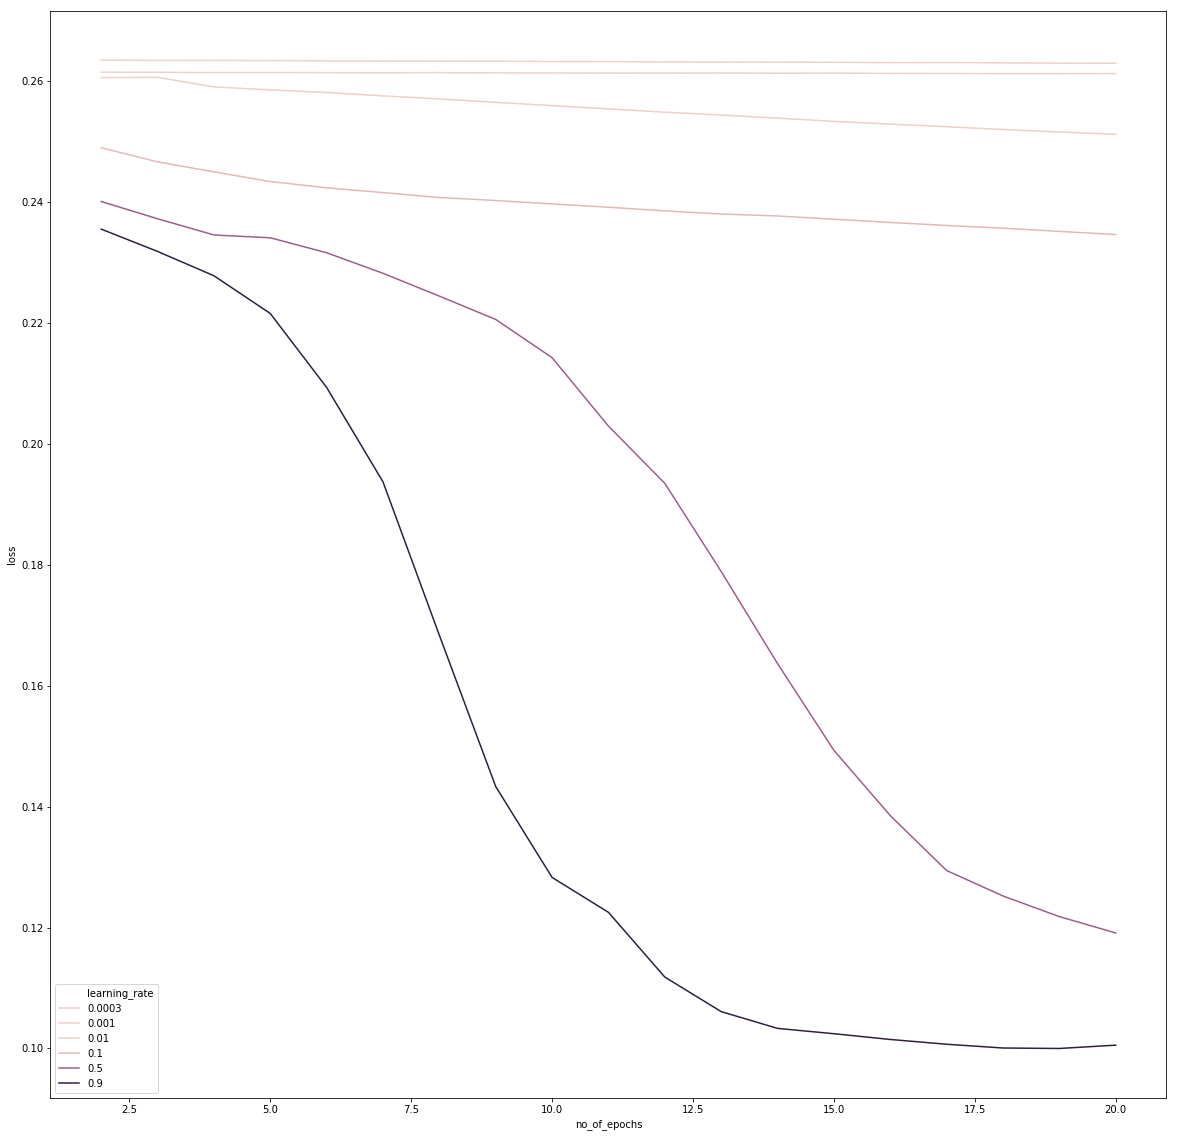

In [71]:
fig,ax=plt.subplots(figsize=(20,20))
sns.lineplot(ax=ax,x='no_of_epochs',y='loss',hue='learning_rate',
             data=test_data[(test_data['loss_function']=='focal_loss_fixed')&(test_data['no_of_epochs']<22)],
             legend='full')

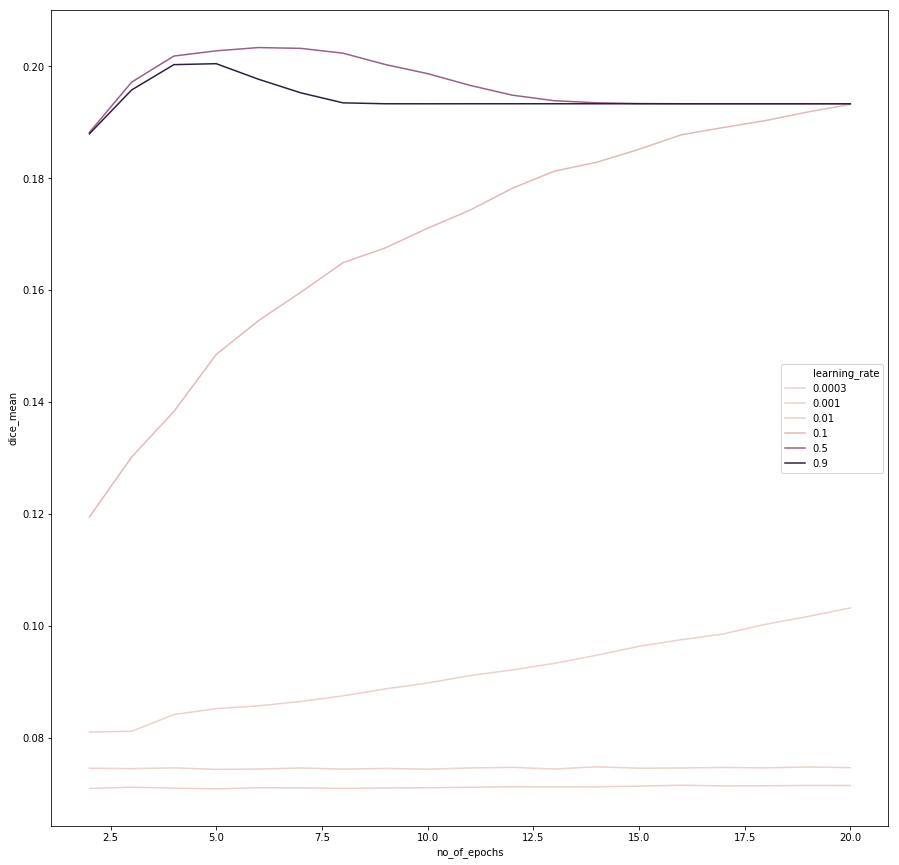

In [72]:
fig,ax=plt.subplots(figsize=(15,15))
sns.lineplot(ax=ax,x='no_of_epochs',y='dice_mean',hue='learning_rate',
             data=test_data[(test_data['loss_function']=='focal_loss_fixed')&(test_data['no_of_epochs']<22)],
             legend='full')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


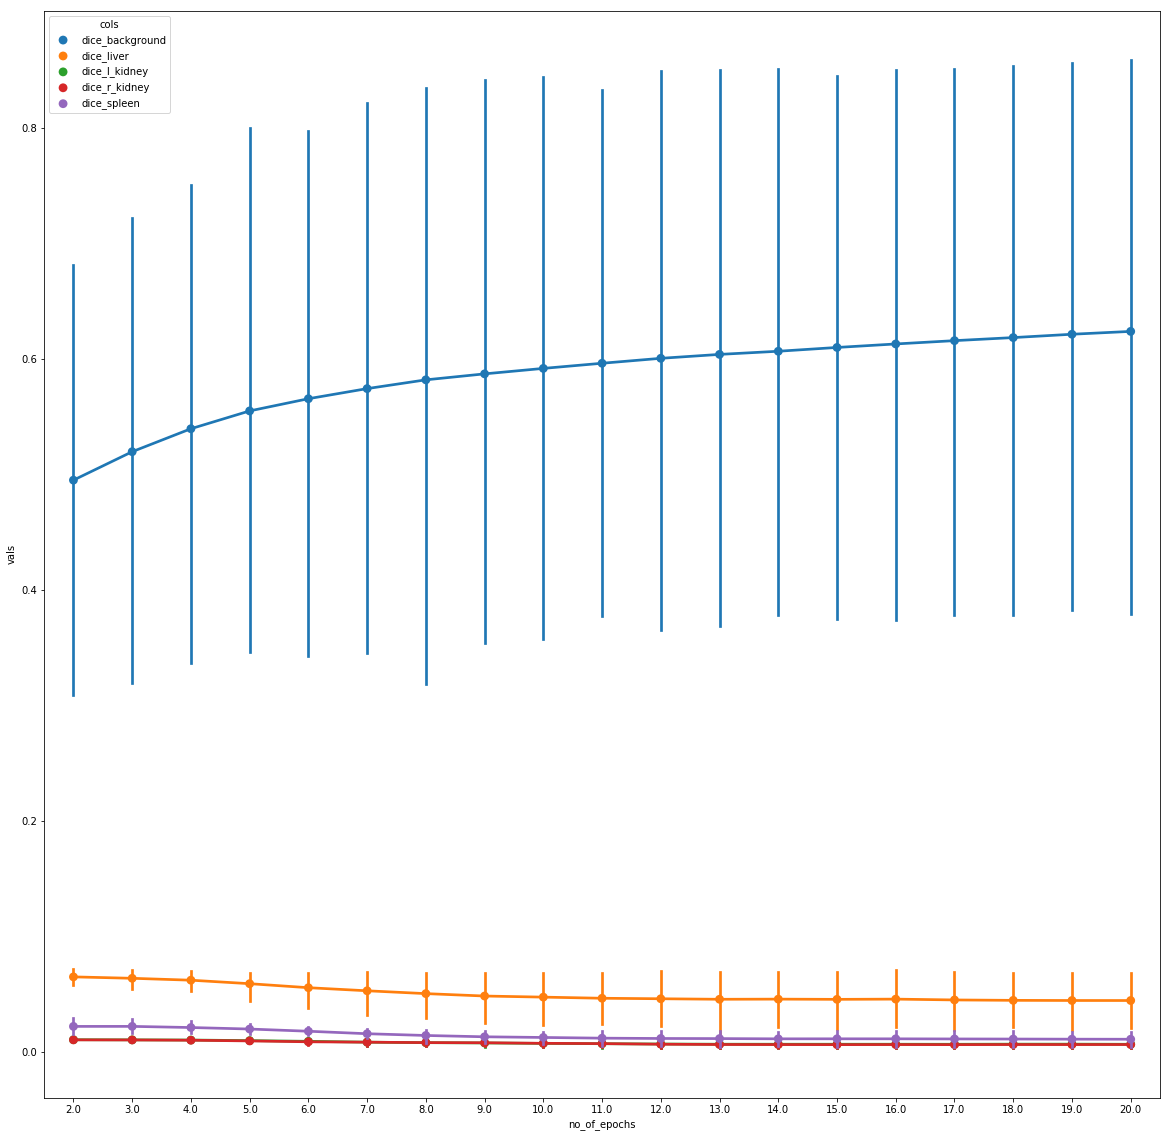

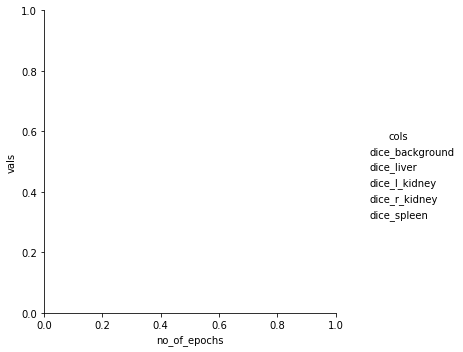

In [90]:
gen_seaborn_df_factorplot(test_data[(test_data['loss_function']=='focal_loss_fixed')&(test_data['no_of_epochs']<22)])

## Aggregate data visualisation information

In [88]:
train_data_mean_loss_diff_info.loc[train_data_mean_loss_diff_info['loss_function']=='focal_loss_fixed',['learning_rate',
                                      'loss_function','file_path']]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,learning_rate,loss_function,file_path
0,0.0003,focal_loss_fixed,NaN
4,0.0010,focal_loss_fixed,NaN
8,0.0100,focal_loss_fixed,NaN
12,0.1000,focal_loss_fixed,NaN
16,0.5000,focal_loss_fixed,NaN
20,0.9000,focal_loss_fixed,NaN


In [ ]:
train_data_mean_loss_diff_info.loc[:,['learning_rate', 'loss_function','file_path']]